# Entanglement scaling in MERA systems

### Exact ground state energy including finite-size corrections

In [1]:
EnAPBC=[-1.270005811417927, -1.2724314193572888, -1.2730375326245706, -1.273189042909428, -1.2732269193538452, -1.2732363883945284];
En=[-1.2797267740319183, -1.2748570272966502, -1.273643645891852, -1.273340553194287, -1.2732647957982595, -1.273245857435202, -1.273241122906045, -1.273239939277603]
Ecorr = map( (x)-> (x+(4/pi)), En );
#coeff = map( (a,b) -> (b*(2^(2*a))), enumerate(Ecorr))

8-element Array{Float64,1}:
 -0.00648723 
 -0.00161748 
 -0.000404101
 -0.000101008
 -2.52511e-5 
 -6.3127e-6  
 -1.57817e-6 
 -3.94542e-7 

In [2]:
for (a,b) in enumerate(Ecorr)
    println(b*(81*2^(2*(a-1))))
end
println("--------------------")
pi/6

-0.5254655730371949
-0.5240643499219226
-0.5237150990693564
-0.5236278520998354
-0.523606044373139
-0.5236005920469324
-0.5235992226125745
-0.5235988506574358
--------------------


0.5235987755982988

### Plotting entanglement of threesite reduced density matrices at each scale

In [3]:
using JLD

In [4]:
include("BinaryMERA.jl")
include("OptimizeMERA.jl")

improveGraft! (generic function with 2 methods)

In [5]:
function entropy(rho3site)
    U,S,Vdag=tensorsvd(rho3site, [1,2,3], [4,5,6])
    EE = mapreduce( (x) -> -x*log(x) , +, S)
    return EE
end

entropy (generic function with 1 method)

In [6]:
macro fm(i,chi)
    @show :(fill(chi, $(i)))
end

function fnstring(i,chi)
    filenamestring = "solutionMERA_$(i)layers_"*string(([8;@fm(i,chi)]...))*"shape.jld"
    return filenamestring
end

function getEntList(i::Int,chi::Int)
    filenamestring = fnstring(i,chi) |> eval
    #println(filenamestring)
    z=load(filenamestring,"m_$(i)layers");
    rlist=buildReverseRhosList(z) |> reverse; 
    Slist=map(entropy,rlist)
    return Slist
end

$(Expr(:quote, :(fill(chi,$(Expr(:$, :i)))))) = :(fill(chi,i))


getEntList (generic function with 1 method)

# The plots

In [10]:
cd("../mp2-run3/")

In [8]:
using PyPlot

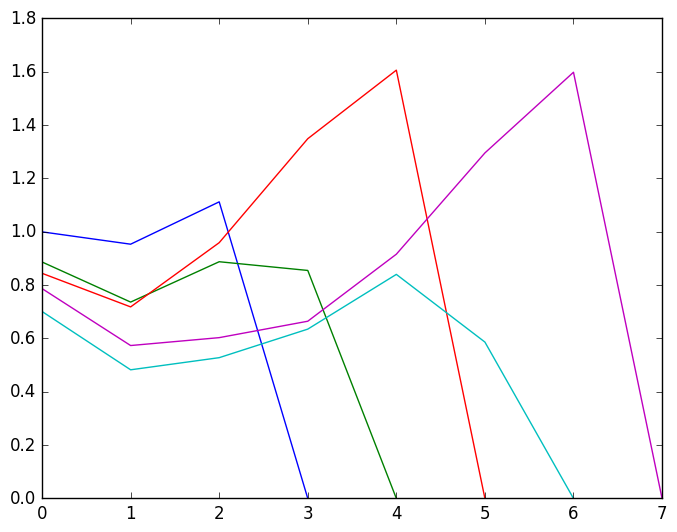

In [11]:
macro makeplt(i)
    return :(plot(collect(0:i), getEntList(i,5)))
end

for i in collect(3:7)
    @makeplt i
end